In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv")
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del nome_area


In [85]:
df.drop(columns = ["area", "codice_NUTS1","codice_NUTS2", "codice_regione_ISTAT"], inplace = True)
df

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


Eliminare i dati nulli


In [86]:
df.dropna(inplace=True)
df

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


In [87]:
print(df.loc[df["comune"] == "MILANO"])

    provincia  ...  nome_area
128    MILANO  ...  Lombardia
129    MILANO  ...  Lombardia
130    MILANO  ...  Lombardia
131    MILANO  ...  Lombardia
132    MILANO  ...  Lombardia
133    MILANO  ...  Lombardia
134    MILANO  ...  Lombardia
135    MILANO  ...  Lombardia
136    MILANO  ...  Lombardia
137    MILANO  ...  Lombardia
138    MILANO  ...  Lombardia
139    MILANO  ...  Lombardia
140    MILANO  ...  Lombardia
141    MILANO  ...  Lombardia

[14 rows x 4 columns]


Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali


In [88]:
comune = input("Inserire il comune: ")
a = list(df["comune"])
if comune not in a:
  print("Comune non esistente")
else:
  print(df.loc[df["comune"] == comune])

Inserire il comune: MA
Comune non esistente


Visualizzare il numero di punti vaccinali di ogni regione. Visualizzare il nome della regione e il numero di punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più punti vaccinali a quella che ne ha di meno)


In [89]:
df2 = df.groupby("nome_area")["presidio_ospedaliero"].count().sort_values(ascending = False)
df2

nome_area
Lombardia                             65
Sicilia                               33
Piemonte                              28
Campania                              27
Lazio                                 20
Liguria                               14
Emilia-Romagna                        13
Toscana                               12
Sardegna                              12
Puglia                                11
Veneto                                 7
Abruzzo                                7
Marche                                 7
Provincia Autonoma Bolzano / Bozen     7
Calabria                               6
Friuli-Venezia Giulia                  5
Basilicata                             5
Umbria                                 4
Provincia Autonoma Trento              3
Valle d'Aosta / Vallée d'Aoste         2
Molise                                 2
Name: presidio_ospedaliero, dtype: int64

Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.


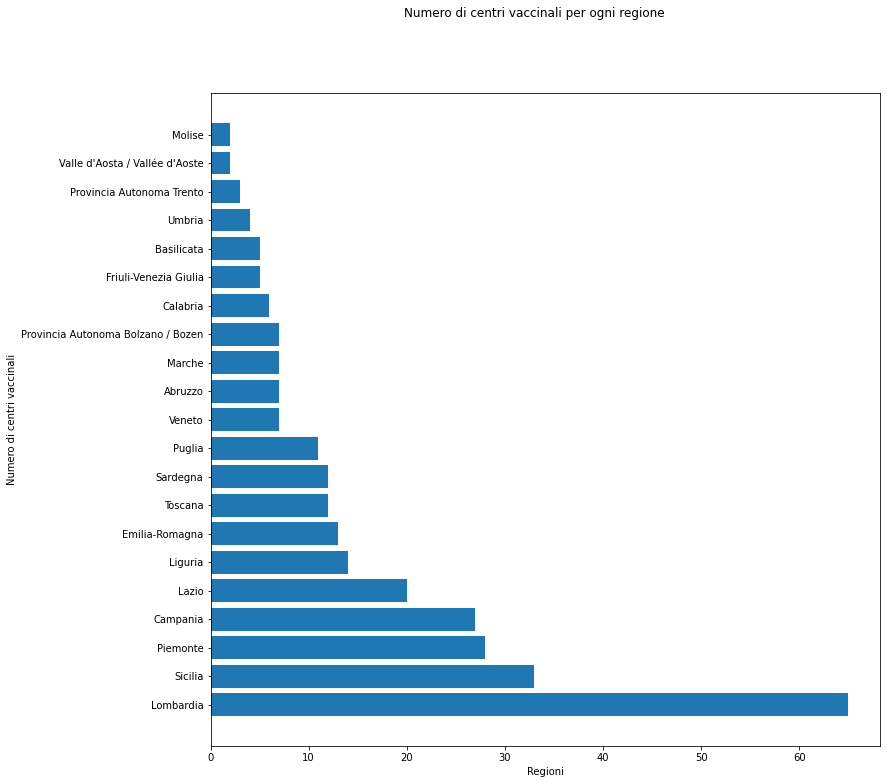

In [114]:
fig = plt.figure(figsize = (12,12))
ax = plt.axes()
ax.barh(df2.index, df2.values)
fig.suptitle("Numero di centri vaccinali per ogni regione")
ax.set_xlabel("Regioni")
ax.set_ylabel("Numero di centri vaccinali")
plt.show()

Visualizzare il numero di province per ogni regione


In [104]:
df5 = df.drop_duplicates(subset = "provincia")
df6 = df5.groupby("nome_area")["provincia"].count().reset_index()
df6

,nome_area,provincia
0,Abruzzo,4
1,Basilicata,2
2,Calabria,5
3,Campania,5
4,Emilia-Romagna,9
5,Friuli-Venezia Giulia,4
6,Lazio,6
7,Liguria,5
8,Lombardia,12
9,Marche,5


In [92]:
df3 = df.pivot_table(columns=['nome_area','provincia'], aggfunc='size').reset_index()
df4 = df3.groupby("nome_area")["provincia"].count().reset_index()
df4

,nome_area,provincia
0,Abruzzo,4
1,Basilicata,2
2,Calabria,5
3,Campania,5
4,Emilia-Romagna,9
5,Friuli-Venezia Giulia,4
6,Lazio,6
7,Liguria,5
8,Lombardia,12
9,Marche,5


Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda


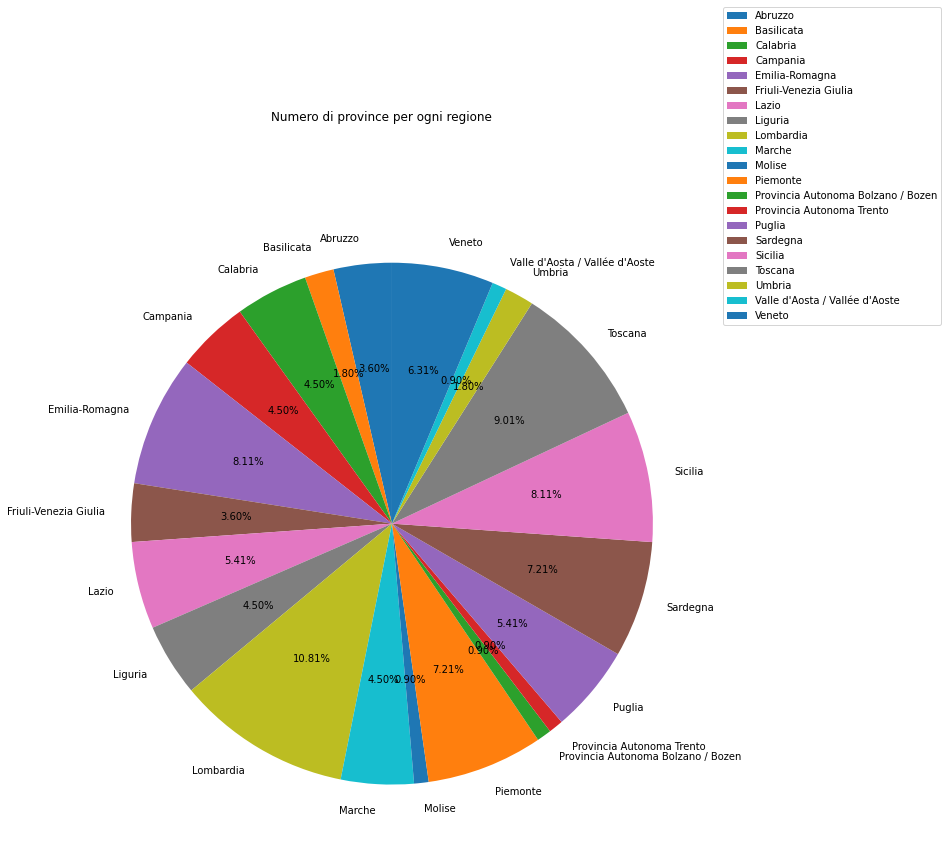

In [112]:
fig = plt.figure(figsize = (12,12))
ax = plt.axes()
fig.suptitle("Numero di province per ogni regione")
ax.pie(df4["provincia"], labels = df4["nome_area"], autopct = "%1.2f%%", startangle = 90)
ax.legend(bbox_to_anchor=(1.0,1.3))
plt.show()

Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il grafico a torta

Salvare il grafico in un file .png


In [94]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>